In [1]:
import numpy as np
from ICF2 import *

Função para obter todos os Gs precisos

In [2]:
def funcgs3(xc): ## Personalizar de acordo com os gs utilizados

    n = len(xc)

    g1 = np.array([1.0]*n)
    g2 = np.array(xc)
    g3 = np.array(xc)**2

    gm = [g1, g2, g3]

    return gm

Função para montar o sistema linear a ser resolvido

In [3]:
def montarMatriz(gs, xc, fx):
    n = len(gs)
    m = len(xc)
    A = np.zeros((n, n))
    B = np.array([0.0]*n) ## é realmente importante especificar que é um float com 0.0 !

    

    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, m):
                A[i][j] += gs[j][k]*gs[i][k]
    
    for i in range(0, n):
        soma = 0
        for k in range(0, m):
            soma += fx[k]*gs[i][k]
        B[i] = soma

    return A, B

Resolução Detalhada:

In [4]:
## Pontos:
fx = [0.19, 0.36, 0.75, 0.87, 0.91, 0.96, 0.99, 0.99, 0.94, 0.87, 0.67, 0.51, 0.43, 0.36, 0.11]
x = [0.1, 0.2, 0.5, 0.65, 0.70, 0.80, 0.90, 1.10, 1.23, 1.35, 1.57, 1.70, 1.75, 1.80, 1.94]

gs = funcgs3(x) ## Obter os Gs 
for i in range(0, len(gs)):
    for k in range(0, len(x)):
        print(f'{gs[i][k]:.2f} ', end="")
    print('\n')    

1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 

0.10 0.20 0.50 0.65 0.70 0.80 0.90 1.10 1.23 1.35 1.57 1.70 1.75 1.80 1.94 

0.01 0.04 0.25 0.42 0.49 0.64 0.81 1.21 1.51 1.82 2.46 2.89 3.06 3.24 3.76 



In [5]:
A, B = montarMatriz(gs, x, fx) ## Montar o sistema linear (mostrado abaixo)
for i in range(0, len(A)):
    for j in range(0, len(A)):
        print(f'{A[i][j]:.2f} ', end="")
    print('\n')  

print('\n')

for i in range(0, len(B)):
    print(f'{B[i]:.2f} ', end="") 


15.00 16.29 22.63 

16.29 22.63 34.92 

22.63 34.92 57.09 



9.91 10.28 12.66 

In [6]:
alphas = solucao_direta(A, B) ## Obter os coeficientes alpha resolvendo o sistema linear (ver "Sistemas Lineares")
print(alphas)


[0.0008161387241202078, 1.995321590526388, -0.9989893804178136]


Resolução Simplificada

In [9]:
## Resolvendo diretamente:

fx = [0.19, 0.36, 0.75, 0.87, 0.91, 0.96, 0.99, 0.99, 0.94, 0.87, 0.67, 0.51, 0.43, 0.36, 0.11]
x = [0.1, 0.2, 0.5, 0.65, 0.70, 0.80, 0.90, 1.10, 1.23, 1.35, 1.57, 1.70, 1.75, 1.80, 1.94]


gm = funcgs3(x)
  

alphas = minimos_quadrados(x, fx, gm) # Função definida na Biblioteca
print(alphas)

erro = erro_min_quadrados(x, fx, gm, alphas) # Função definida na Biblioteca
print(erro)


[0.0008161387241202078, 1.995321590526388, -0.9989893804178136]
0.0001398212884069185


Plotando o Gráfico

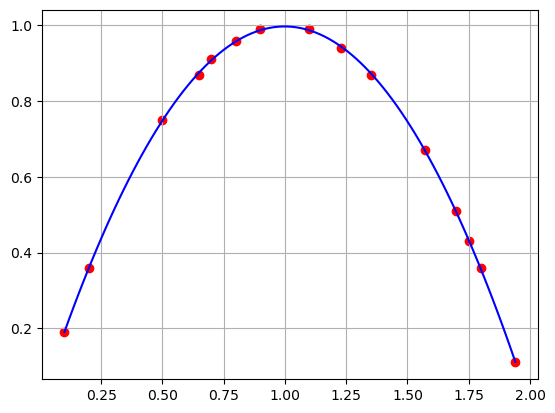

In [8]:
import matplotlib.pyplot as plt

xm = np.linspace(x[0], x[-1], 100) ## cria uma "malha fina" de 100 pontos do primeiro x ao último


fi = [] ## Obtendo todos os phis

for i in range(0, len(xm)):
    fi.append(alphas[0]*1.0 + alphas[1]*xm[i] + alphas[2]*(xm[i]**2)) 

# xm, fi = obtempontosP(x, alphas, 100)



plt.scatter(x, fx, color='red', label='Dados exp.')
plt.plot(xm, fi, color='blue', label='Ajuste')
plt.grid()
plt.show()